In [10]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_parquet('../../data/sber_bank/sbolpro.parquet')

In [12]:
data.head()

,timestamp,user_id,product_id,is_sold,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_1335,feature_1336,feature_1337,feature_1338,feature_1339,feature_1340,feature_1341,feature_1342,feature_1343,feature_1344
0,2023-01-15,1010508,1,0,-0.361854,-0.172997,-0.134458,-0.18008,-0.230458,-0.201765,...,-0.330765,-0.155774,-0.123948,-0.188584,-0.372165,-0.325964,-1.030499,-0.234190,-0.244455,0.269814
1,2023-01-15,1010508,2,0,-0.361854,-0.172997,-0.134458,-0.18008,-0.230458,-0.201765,...,-0.330765,-0.155774,-0.123948,-0.188584,-0.372165,-0.325964,-1.030499,-0.234190,-0.244455,1.535497
2,2023-01-15,1010508,10,0,-0.361854,-0.172997,-0.134458,-0.18008,-0.230458,-0.201765,...,-0.330765,-0.155774,-0.123948,-0.188584,-0.372165,-0.325964,-1.030499,-0.234190,-0.244455,0.119081
3,2023-01-15,1025935,2,0,-0.361854,-0.172997,-0.134458,-0.18008,-0.230458,-0.201765,...,-0.330765,-0.155774,-0.123948,-0.188584,-0.372165,-0.325964,-0.863125,4.067207,-0.244455,1.535497
4,2023-01-15,1025935,10,0,-0.361854,-0.172997,-0.134458,-0.18008,-0.230458,-0.201765,...,-0.330765,-0.155774,-0.123948,-0.188584,-0.372165,-0.325964,-0.863125,4.067207,-0.244455,0.119081


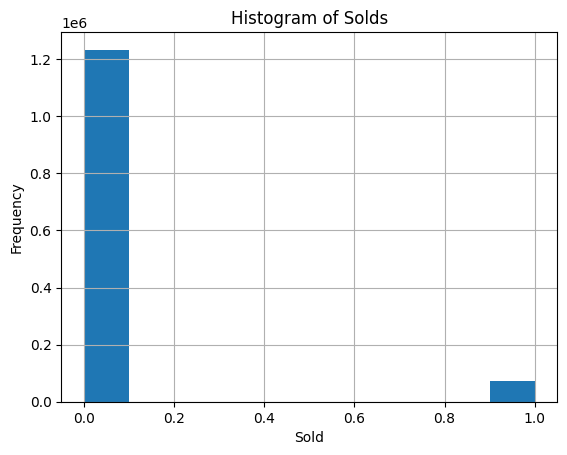

In [13]:
data['is_sold'].hist()

# Adding labels and title
plt.xlabel('Sold')
plt.ylabel('Frequency')
plt.title('Histogram of Solds')

# Show the plot
plt.show()

In [14]:
data.product_id.nunique()

19

In [15]:
data.user_id.nunique()

200000

In [16]:
data = data[['user_id', 'product_id', 'is_sold', 'timestamp']]

In [17]:
# filter out non-sold items:
data = data[data['is_sold'] == 1]

In [18]:
data.timestamp = pd.to_datetime(data.timestamp, format='%Y%m%d').astype(int)

In [17]:
data.to_parquet(os.path.join('..', '..', 'data', 'sber_bank', 'interactions.parquet'), index=False)

In [19]:
data

,user_id,product_id,is_sold,timestamp
20,1200116,10,1,1673740800000000000
38,1542867,6,1,1673740800000000000
43,1625588,10,1,1673740800000000000
69,2625498,5,1,1673740800000000000
74,2913352,0,1,1673740800000000000
...,...,...,...,...
1306293,9811107,6,1,1684108800000000000
1306308,9818110,7,1,1684108800000000000
1306313,9822189,6,1,1684108800000000000
1306433,9957721,10,1,1684108800000000000


In [ ]:
from src.preprocessing import ClassicDataset
from src.utils.processing import data_split


# split data into samples
(interactions_train, weights_train), \
(interactions_val, weights_val), \
(interactions_test, _) = data_split(
    dataset.prepared_data, cfg_data, sparse_type='coo'
)